# 2.4. Nächste-Nachbarn-Klassifikation

>## <ins>Table of contents</ins>
>* [**2.4.1. k-nearest neighbour (KNN) Grundlagen**](#2_4_1)
>* [**2.4.2.  Nächste-Nachbarn-Regression**](#2_4_2)
>* [**2.4.3. Merkmalskalierung**](#2_4_3)
>* [**2.4.4. Nicht-lineare Modelle**](#nl_modelle)

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt


## 2.4.1. k-nearest neighbour (KNN) Grundlagen <a name="2_4_1"></a>
Die Grundidee des KNN-Algorithmus (k-nearest neighbour) besteht darin, dass zur Vorhersage der Klasse einfach die vorherrschende Klasse der $k \in \mathbb{N}$ nächsten Nachbarn (aus dem Trainingsdatensatz) im Merkmalsraum gewählt wird.

Hier sind die grundlegenden Schritte des KNN-Algorithmus:
1. **Distanzberechnung** `nearestk(D, x)`: Für einen gegebenen Testpunkt berechnet der Algorithmus die Distanz zu allen Punkten im Trainingsdatensatz. Die Distanz kann auf verschiedene Weisen berechnet werden, die gebräuchlichste ist jedoch die euklidische Distanz.
3. **Auswahl der k nächsten Nachbarn** `maj({y1,…, yk})`: Der Algorithmus wählt die k Punkte im Trainingsdatensatz, die dem Testpunkt am nächsten sind. k ist eine vom Benutzer festgelegte Konstante.
4. **Vorhersage** `clfD,k(x) = maj(nearestk(D, x))`: Für eine Klassifikationsaufgabe bestimmt der Algorithmus die am häufigsten vorkommende Klasse unter den k nächsten Nachbarn und weist diese Klasse dem Testpunkt zu.

Formal sieht das so aus:
> Sei $D$ ein Datensatz, $k \in \mathbb{N}$ und $x \in \mathbb{R}^n$. Definiere $$clf_{D,k}(x) = maj(nearest_k(D, x))$$ mit $$nearest_k(D, x) = \{y_1,..., y_k\} \subseteq \{y^{(1)},..., y^{(m)}\}$$ und $$maj(\{y_1,..., y_k\}) = y \in \{y_1,..., y_k\}$$.

Mit anderen Worten, `nearest_k(D, x)` bestimmt diejenigen k verschiedenen Klassen derjenigen Beispiele des Datensatzes D, die sich bezüglich der Euklidischen Distanz am nächsten zu x befinden. Die Funktion `maj` bestimmt dann diejenige Klasse, die unter diesen k nächsten Nachbarn am häufigsten auftritt. 

#### Beispiel 1:
Wir klassifizieren Filme in die beiden Klassen *Kinderfilm* `0` und *Actionfilm* `1` anhand der beiden Merkmale *Länge* und *Kosten*.

In [19]:
D_movies = pd.read_csv("./uebung_2_4/dataset_movies.csv")
D_movies

,length,costs,type
0,90,100,0
1,101,120,0
2,103,90,0
3,89,200,0
4,122,240,1
5,100,90,0
6,131,120,1
7,94,170,1
8,99,98,0
9,125,78,0


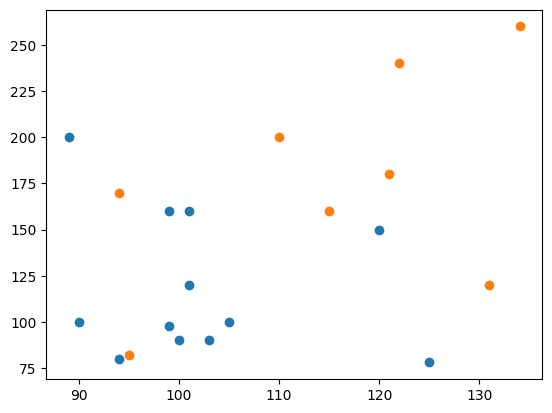

In [20]:
X = D_movies.iloc[:, 0:-1].values
y = D_movies.iloc[:, 2].values

plt.figure()
plt.scatter(D_movies[y==0]["length"], D_movies[y==0]["costs"])
plt.scatter(D_movies[y==1]["length"], D_movies[y==1]["costs"])
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

clf1 = KNeighborsClassifier(n_neighbors=1).fit(X,y)
clf3 = KNeighborsClassifier(n_neighbors=3).fit(X,y)
clf5 = KNeighborsClassifier(n_neighbors=5).fit(X,y)

Der Parameter `n_neighbors=3` legt die Anzahl der nächsten Nachbarn fest, die der Klassifikator berücksichtigt, wenn er Vorhersagen trifft. In diesem Fall wird der Klassifikator die drei nächsten Nachbarn eines gegebenen Datenpunkts betrachten.

Das Ergebnis dieser Zeile ist ein trainierter KNN-Klassifikator, der in der Variable `clf` gespeichert ist und zum Vorhersagen von Klassen für neue Daten verwendet werden kann.

Als nächstes, veruchen wir eine Darstellung der Entscheidungsgrenze für den gegebenen Klassifikator `clf` zu erzeugen. Hierzu sind 3 Parameter wichtig: 
- `response_method="predict"` gibt an, welche Methode des Klassifikators verwendet wird, um die Entscheidungsfunktion zu berechnen. In diesem Fall wird die `predict` Methode des Klassifikators verwendet.
- Der Parameter `plot_method="pcolormesh"` gibt an, welche Methode zum Plotten der Entscheidungsgrenze verwendet wird. In diesem Fall wird die `pcolormesh` Methode verwendet, die ein pseudofarbenes 2D-Rasterdiagramm erstellt.
- `ax=ax`: Dies gibt an, auf welchem Subplot die Entscheidungsgrenze gezeichnet wird. In Ihrem Code sind dies die Subplots `axs[0]`, `axs[1]` und `axs[2]`.

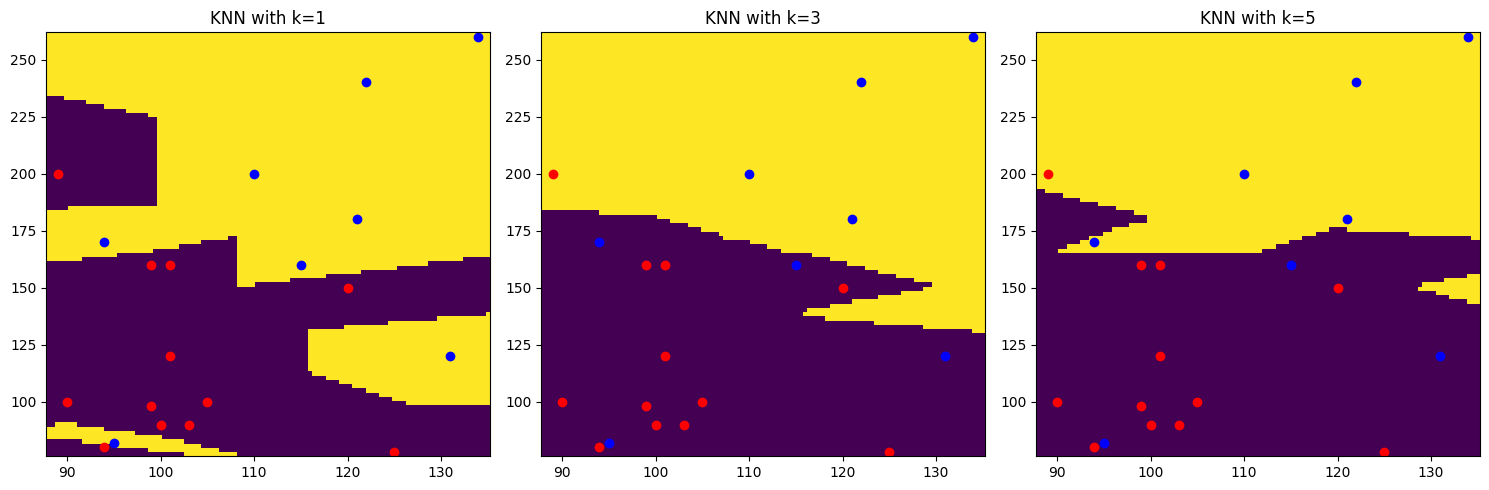

In [25]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for clf, ax in zip([clf1, clf3, clf5], axs):
    DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", plot_method="pcolormesh", ax=ax)
    ax.scatter(D_movies[y==0]["length"], D_movies[y==0]["costs"], color='red')
    ax.scatter(D_movies[y==1]["length"], D_movies[y==1]["costs"], color='blue')
    

axs[0].set_title('KNN with k=1')
axs[1].set_title('KNN with k=3')
axs[2].set_title('KNN with k=5')

# Display the figure with the grid of subplots
plt.tight_layout()
plt.show()

## 2.4.2. Nächste-Nachbarn-Regression <a name="2_4_2"></a>
Die Nächste-Nachbarn-Regression ist eine Anwendung des k-nearest neighbors (KNN) Algorithmus auf Regressionsprobleme. Anstatt die vorherrschende Klasse der Nachbarschaft als Vorhersage zu verwenden (wie es bei der Klassifikation der Fall ist), wird bei der Regression <ins>der Mittelwert der Zielwerte der Nachbarschaft</ins> als Vorhersage verwendet. Formal heißt das:

Sei $D$ ein Datensatz für Regression, $k \in \mathbb{N}$ und $x \in \mathbb{R}^n$. 
Definiere $$regr_{D,k}(x) = \frac{1}{k}\sum_{y \in nearest_k(D,x)} y$$ mit $nearest_k(D, x)$ wie in Definition 1.

Mit anderen Worten, $nearest_k(D, x)$ bestimmt die k nächsten Nachbarn von x im Datensatz D. Die Funktion $regr_{D,k}(x)$ berechnet dann den Durchschnitt der Zielwerte dieser k nächsten Nachbarn. Dieser Durchschnitt wird als Vorhersage für den Zielwert von x verwendet.

#### Beispiel 2:
Wir betrachten den Datensatz `D_houses`. Drei verschiedene KNN-Regressoren werden für $k = 1,3,5$ erstellt und ihre Vorhersagen werden wie folgt dargestellt:

   Flaeche    Preis
0      100   210000
1      120   270000
2      160   290000
3      170   470000
4      200   620000
5      210   680000
6      310  1600000
7      330  1900000
8      370  2570000
9      400  3300000


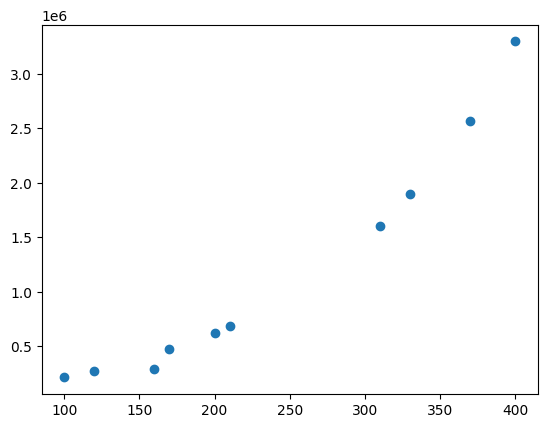

In [41]:
import pandas as pd

# Create DataFrame
D_houses = pd.DataFrame({
    'Flaeche': [100, 120, 160, 170, 200, 210, 310, 330, 370, 400],
    'Preis': [210000, 270000, 290000, 470000, 620000, 680000, 1600000, 1900000, 2570000, 3300000]
})

# Print DataFrame
print(D_houses)

X = D_houses.iloc[:, 0:-1].values
y = D_houses.iloc[:, 1].values

fig = plt.figure()
plt.scatter(D_houses["Flaeche"], D_houses["Preis"])
plt.show()

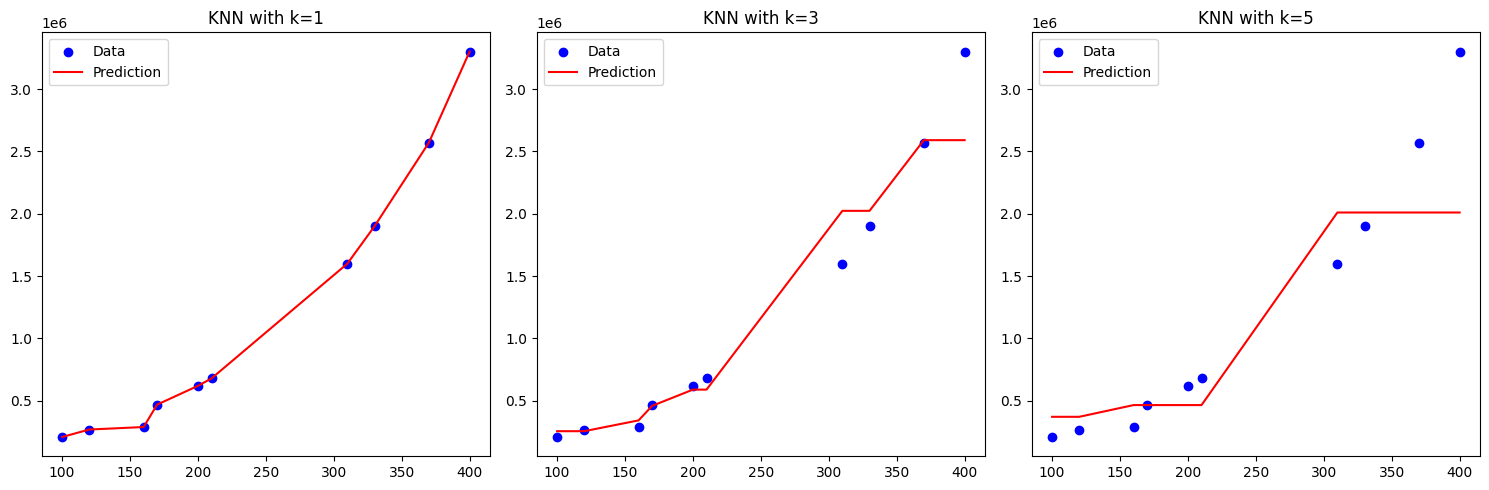

In [46]:
from sklearn.neighbors import KNeighborsRegressor

clf1 = KNeighborsRegressor(n_neighbors=1).fit(X,y)
clf3 = KNeighborsRegressor(n_neighbors=3).fit(X,y)
clf5 = KNeighborsRegressor(n_neighbors=5).fit(X,y)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for clf, ax, title in zip([clf1, clf3, clf5], axs, ['KNN with k=1', 'KNN with k=3', 'KNN with k=5']):
    ax.scatter(X, y, color='blue', label='Data')
    ax.plot(X, clf.predict(X), color='red', label='Prediction')
    ax.set_title(title)
    ax.legend()

# Display the figure with the grid of subplots
plt.tight_layout()
plt.show()

## 2.4.3. Merkmalskalierung <a name="2_4_3"></a>
Das KNN-Algorithmus (insbesondere bei der Verwendung der Euklidischen Norm) hat ein Nachteil: <ins>
Empfindlichkeit bzgl. verschiedener Skalen der Merkmale</ins>
Dies bedeutet, dass Merkmale mit größeren Skalen einen größeren Einfluss auf die Berechnung der Distanz zwischen den Datenpunkten haben können, was zu einer Verzerrung der Ergebnisse führen kann.
#### Beispiel 3:
Wir betrachten wieder Beispiel 11 aus Abschnitt 2.2.2 zur Klassifikation von Tieren in die drei Klassen 
Hund (Klasse 0), Wolf (Klasse 1) und Dingo (Klasse 2) und benutzen dazu die Merkmale Alter (im Sinne von erreictem Lebensalter des Tieres) und Gewich.t.

   age  weight  type
0   12      12     0
1   13      34     0
2   16      30     1
3   14      15     2
4   15      39     1
5   15      13     2
6   10       5     0
7   17      56     1
8   14      11     2
9   11      23     0


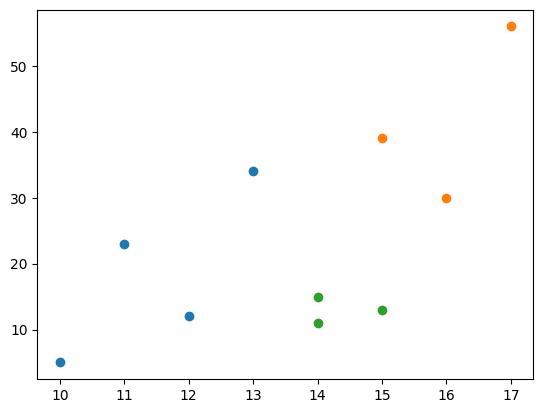

In [67]:
D_animals = pd.read_csv("./uebung_2_4/sl_logreg_ex_animals.csv")
print(D_animals)
X = D_animals.iloc[:, 0:-1].values
y = D_animals.iloc[:, 2].values

fig = plt.figure()
plt.scatter(D_animals[y==0]["age"], D_animals[y==0]["weight"])
plt.scatter(D_animals[y==1]["age"], D_animals[y==1]["weight"])
plt.scatter(D_animals[y==2]["age"], D_animals[y==2]["weight"])
plt.show()

Wir betrachten die Entscheidungsgrenzen von drei verschiedenen KNN-Klassifikatoren $k = 1,3,5$.

1. `Fall k = 1`: es wird nur der nächste Nachbar für die Klassifikation berücksichtigt.

   Wir stellen fest, dass die Entscheidungsgrenzen des Klassifikators in diesem Fall etwas unintuitiv ist.

   **Beispiel** Tier x, das sich auf der Verbindungslinie zwischen zwei als Hunde klassifizierten Tieren befindet (Tiere 2 und 10), erwartungsgemäß auch als Hund klassifiziert werden sollte. Es gibt jedoch einen Bereich zwischen diesen beiden Tieren, der als Wolf klassifiziert wird.

   **Grund**: Das größere Einfluss des Merkmals "Gewicht", das auf einer größeren Skala verteilt ist als das Merkmal "Alter". Durch die Nutzung der Euklidischen Distanz fallen geringe Abweichungen beim Merkmal "Gewicht" stärker in die Abstandsberechnung ein.

3. `Fälle für k = 3 und k = 5`: hier wird beobachtet, dass Abweichungen im Merkmal "Alter" immer weniger eine Rolle spielen.

>Zusammengefasst zeigt der Text auf, dass der KNN-Algorithmus empfindlich gegenüber der Skalierung der Merkmale ist und dass dies zu unintuitiven Klassifikationsergebnissen führen kann.

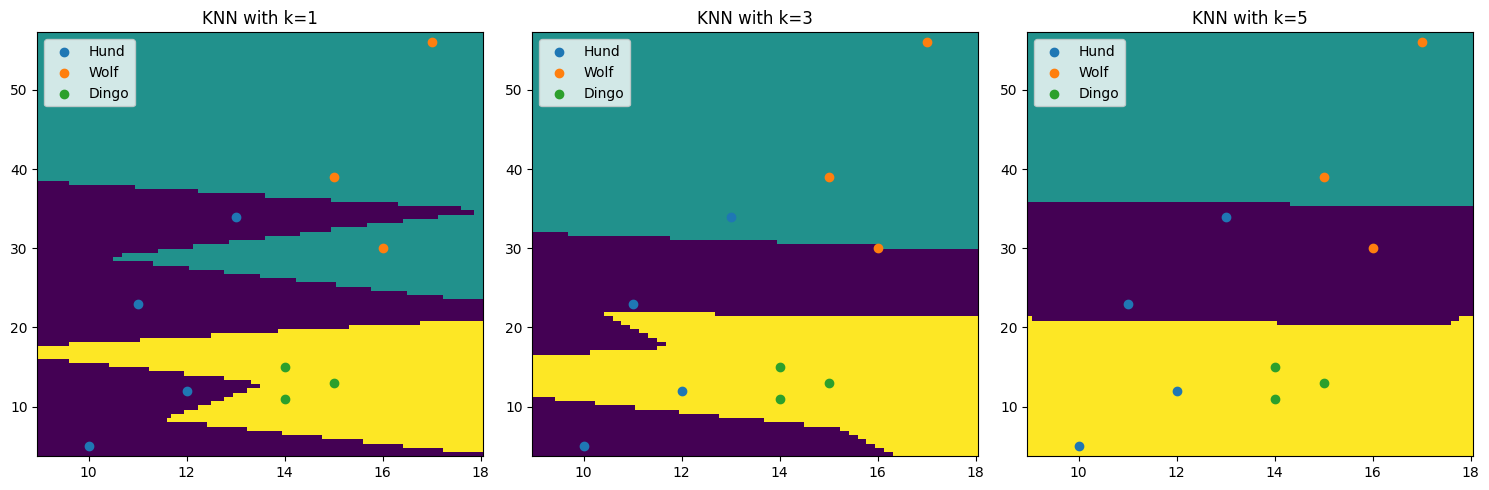

In [68]:
clf1 = KNeighborsClassifier(n_neighbors=1).fit(X,y)
clf3 = KNeighborsClassifier(n_neighbors=3).fit(X,y)
clf5 = KNeighborsClassifier(n_neighbors=5).fit(X,y)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for clf, ax in zip([clf1, clf3, clf5], axs):
    DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", plot_method="pcolormesh", ax=ax)
    ax.scatter(D_animals[y==0]["age"], D_animals[y==0]["weight"], label ='Hund')
    ax.scatter(D_animals[y==1]["age"], D_animals[y==1]["weight"], label ='Wolf')
    ax.scatter(D_animals[y==2]["age"], D_animals[y==2]["weight"], label ='Dingo')
    ax.legend()
    
axs[0].set_title('KNN with k=1')
axs[1].set_title('KNN with k=3')
axs[2].set_title('KNN with k=5')

# Display the figure with the grid of subplots
plt.tight_layout()
plt.show()

Das Problem der unterschiedlichen Skalen bei Merkmalen tritt nicht nur beim KNN-Algorithmus auf, aber auch die meisten Verfahren des maschinellen Lernens können  hier unintuitive Ergebnisse liefern.

**Lösung -->** Merkmalsausprägungen normieren. 

Es gibt dazu verschiedene Ansätze, wir stellen hier die gebäuchlichste **z-Transformation** (oder einfach nur **Standardisierung**) vor.

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

clf1 = KNeighborsClassifier(n_neighbors=1).fit(X_scaled,y)
clf3 = KNeighborsClassifier(n_neighbors=3).fit(X_scaled,y)
clf5 = KNeighborsClassifier(n_neighbors=5).fit(X_scaled,y)

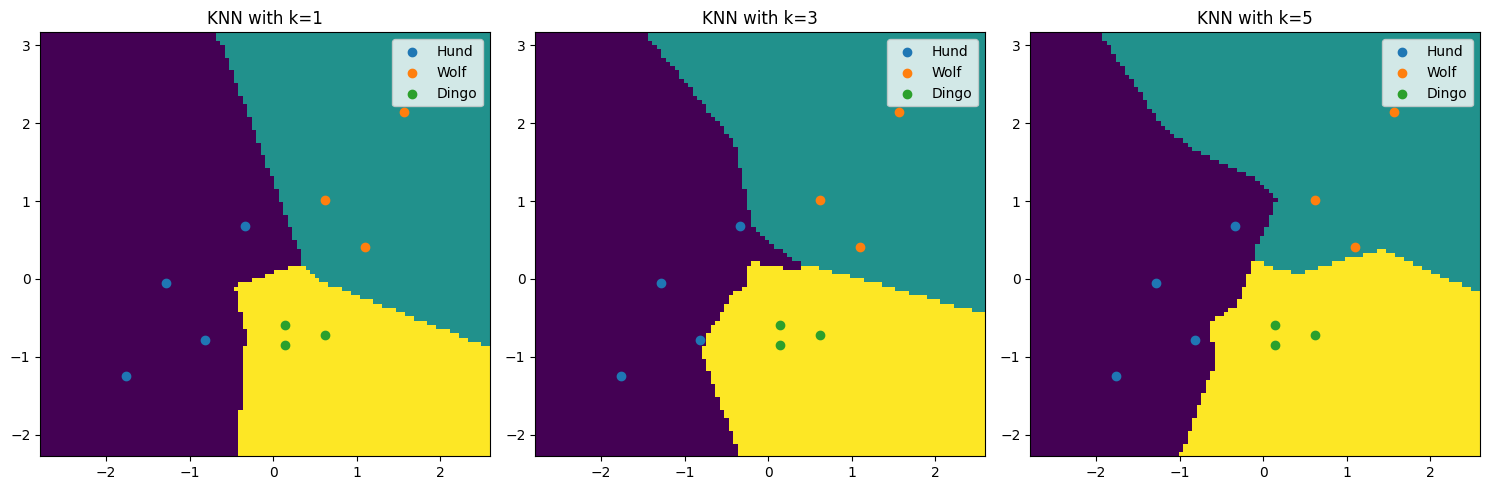

In [65]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for clf, ax in zip([clf1, clf3, clf5], axs):
    DecisionBoundaryDisplay.from_estimator(clf, X_scaled, response_method="predict", plot_method="pcolormesh", ax=ax)
    ax.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], label ='Hund')
    ax.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], label ='Wolf')
    ax.scatter(X_scaled[y==2][:, 0], X_scaled[y==2][:, 1], label ='Dingo')
    ax.legend()

axs[0].set_title('KNN with k=1')
axs[1].set_title('KNN with k=3')
axs[2].set_title('KNN with k=5')

# Display the figure with the grid of subplots
plt.tight_layout()
plt.show()